**Q1** **VISUALIZATION**

1. Load the ./data/college_completion.csv data with Pandas.

In [1]:
import pandas as pd
!git clone https://github.com/ds4e/visualization
# Load dataset from URL
college = pd.read_csv('/content/visualization/assignment/data/college_completion.csv', low_memory=False)

Cloning into 'visualization'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 35 (delta 3), reused 2 (delta 2), pack-reused 30 (from 1)
Receiving objects: 100% (35/35), 7.16 MiB | 11.59 MiB/s, done.
Resolving deltas: 100% (6/6), done.


2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [2]:
# Get the dimensions of the dataset
print("Dataset Dimensions:", college.shape)  # (rows, columns)

# Get the number of observations (rows)
print("Number of Observations:", college.shape[0])

# Get the variable names (column names)
print("Variables Included:", college.columns.tolist())

print(college.head())

Dataset Dimensions: (3798, 63)
Number of Observations: 3798
Variables Included: ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_tr

3. Cross tabulate control and level. Describe the patterns you see.

In [3]:
# Cross-tabulate 'Control' and 'Level'
control_level_crosstab = pd.crosstab(college['control'], college['level'])

# Display the crosstab
print(control_level_crosstab)


level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


These trends describe differences between 2-year and 4-year private for-profit, private not-for-profit, and public universities. Public universities tend to dominate the 2-year category, likely due to the prevelance of community colleges. Private not-for-profit dominates the 4-year space, likely due to a more traditional education style. Private for-profit universities tend to be relatively evenly spread between the two categories, indicated a mix between 2-year and 4-year education styles.

4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

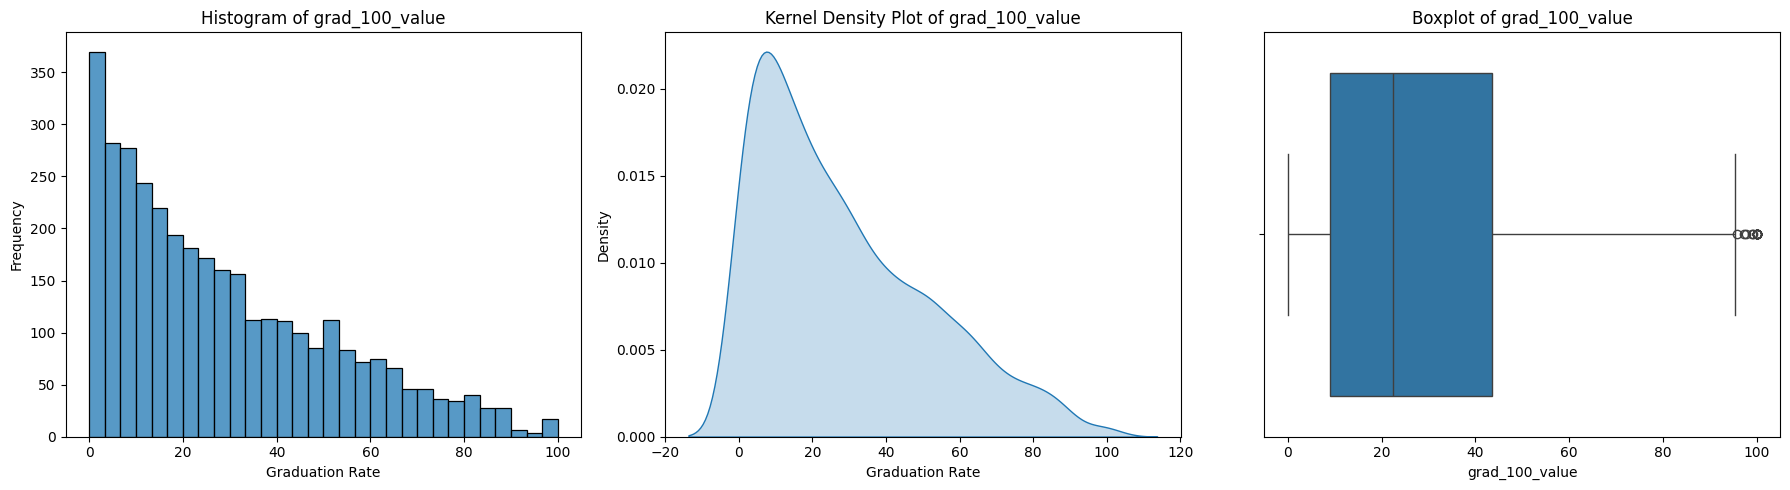

Statistical Summary of grad_100_value:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for better visualization
grad_values = college['grad_100_value'].dropna()

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(grad_values, bins=30, kde=False, ax=axes[0])
axes[0].set_title('Histogram of grad_100_value')
axes[0].set_xlabel('Graduation Rate')
axes[0].set_ylabel('Frequency')

# Kernel Density Plot
sns.kdeplot(grad_values, fill=True, ax=axes[1])
axes[1].set_title('Kernel Density Plot of grad_100_value')
axes[1].set_xlabel('Graduation Rate')

# Boxplot
sns.boxplot(x=grad_values, ax=axes[2])
axes[2].set_title('Boxplot of grad_100_value')

# Show plots
plt.tight_layout()
plt.show()

# Statistical Summary
print("Statistical Summary of grad_100_value:")
print(grad_values.describe())


5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?

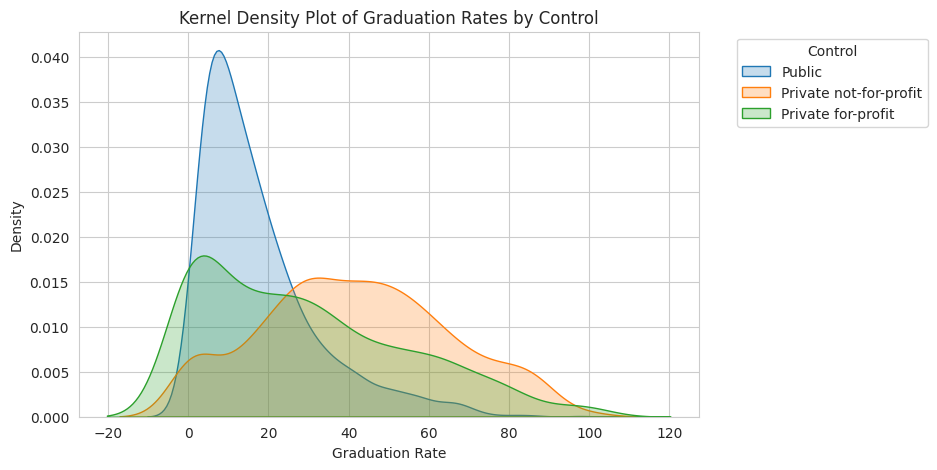

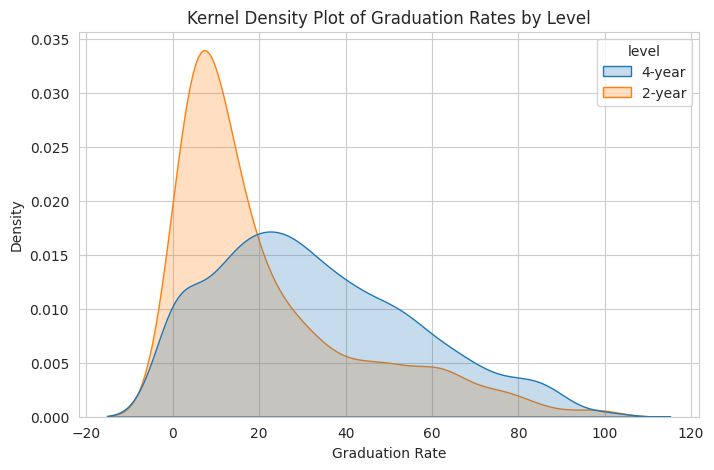

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values
college_clean = college.dropna(subset=['grad_100_value'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for 'grad_100_value' and create a copy
college_clean = college.dropna(subset=['grad_100_value']).copy()

# Set plot style
sns.set_style("whitegrid")

# Create the kernel density plot
plt.figure(figsize=(8, 5))
unique_controls = college_clean['control'].unique()
palette = sns.color_palette("tab10", n_colors=len(unique_controls))
for idx, category in enumerate(unique_controls):
    subset = college_clean[college_clean['control'] == category]
    sns.kdeplot(data=subset, x='grad_100_value', fill=True, color=palette[idx], label=category)
plt.title('Kernel Density Plot of Graduation Rates by Control')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.legend(title='Control', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Kernel Density Plot by Level
plt.figure(figsize=(8, 5))
sns.kdeplot(data=college_clean, x='grad_100_value', hue='level', fill=True, common_norm=False)
plt.title('Kernel Density Plot of Graduation Rates by Level')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.show()

plt.show()

In [14]:
# Grouped statistics by Control
control_stats = college_clean.groupby('control')['grad_100_value'].describe()
print("Graduation Rate Statistics by Control:\n", control_stats)

# Grouped statistics by Level
level_stats = college_clean.groupby('level')['grad_100_value'].describe()
print("\nGraduation Rate Statistics by Level:\n", level_stats)

Graduation Rate Statistics by Control:
                          count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

Graduation Rate Statistics by Level:
          count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


It apppears that private universities tend to have better graduation rates than public universities. It also appears that private not-for-profit have the best graduation rates. This makes sense as those institutions are often more competitive, and have more resources which can ensure graduation. Additionally, it appears that 4-year programs tend to have higher graduation rates than 2-year programs

6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

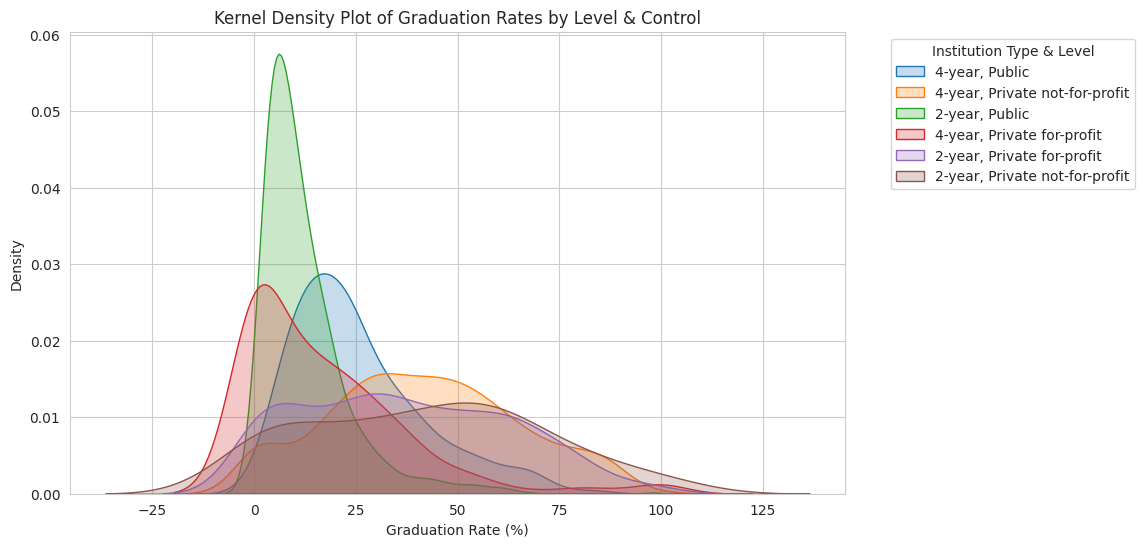

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for 'grad_100_value'
college_clean = college.dropna(subset=['grad_100_value']).copy()

# Create the new variable safely using .loc
college_clean.loc[:, 'levelXcontrol'] = college_clean['level'] + ', ' + college_clean['control']

# Set plot style
sns.set_style("whitegrid")

# Create the kernel density plot
plt.figure(figsize=(10, 6))

# Generate a unique color palette
unique_categories = college_clean['levelXcontrol'].unique()
palette = sns.color_palette("tab10", n_colors=len(unique_categories))

# Loop through categories and plot manually to ensure legend works
for idx, category in enumerate(unique_categories):
    subset = college_clean[college_clean['levelXcontrol'] == category]
    sns.kdeplot(data=subset, x='grad_100_value', fill=True, color=palette[idx], label=category)

# Adjust title and labels
plt.title('Kernel Density Plot of Graduation Rates by Level & Control')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')

# Ensure legend is correctly labeled
plt.legend(title='Institution Type & Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


It appears that the 2-year private not-for-profit, and 4-year private not-for-profit schools have the best graduation rates. This makes sense because these types of schools have more resources and are generally more competitive since they are private.

7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

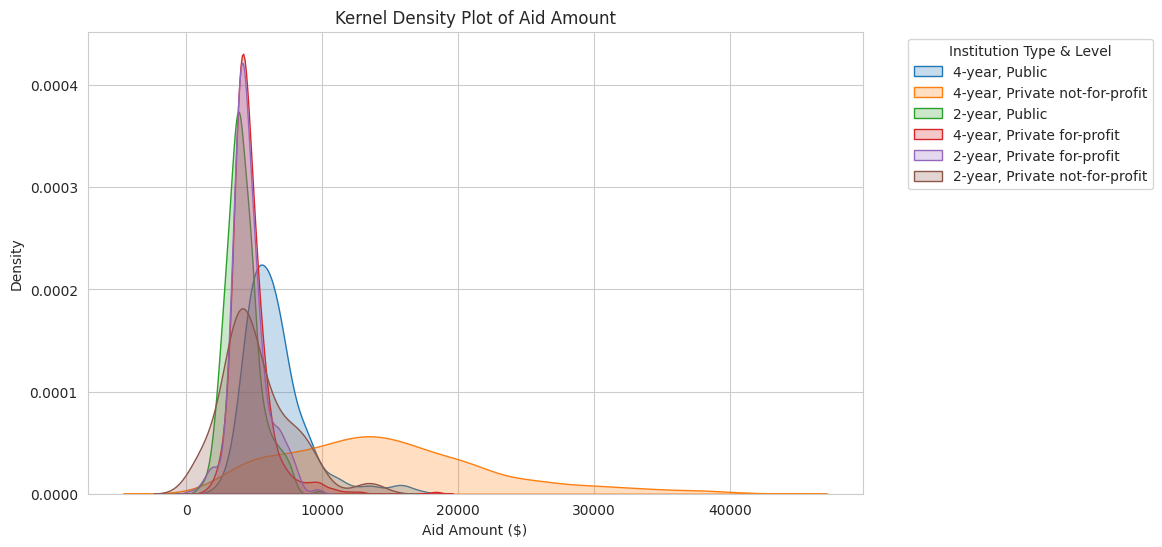

                                count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for 'aid_value' and create a copy
college_clean = college.dropna(subset=['aid_value']).copy()

# Set plot style
sns.set_style("whitegrid")

# Create the kernel density plot
plt.figure(figsize=(10, 6))

# Create the new variable safely using .loc
college_clean.loc[:, 'levelXcontrol'] = college_clean['level'] + ', ' + college_clean['control']

# Generate a unique color palette for different groups
unique_categories = college_clean['levelXcontrol'].unique()
palette = sns.color_palette("tab10", n_colors=len(unique_categories))

# Loop through each category and plot manually
for idx, category in enumerate(unique_categories):
    subset = college_clean[college_clean['levelXcontrol'] == category]
    sns.kdeplot(data=subset, x='aid_value', fill=True, color=palette[idx], label=category)

# Adjust title and labels
plt.title('Kernel Density Plot of Aid Amount')
plt.xlabel('Aid Amount ($)')
plt.ylabel('Density')

# Ensure the legend is correctly labeled
plt.legend(title='Institution Type & Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

# Grouped statistical description of aid_value by level and control
aid_stats = college_clean.groupby(['level', 'control'])['aid_value'].describe()

# Display the results
print(aid_stats)


From the shape of this chart, it can be seen that most aid given to students is around the $5000 mark. Certain private schools give more aid, but generally receiving over 20,000 is rare within public schools. This is often because tuition at public schools does not usually exceed 20,000, and is cheaper in general. In contrast, tutition can be extremely expensive at private instituitions.

8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

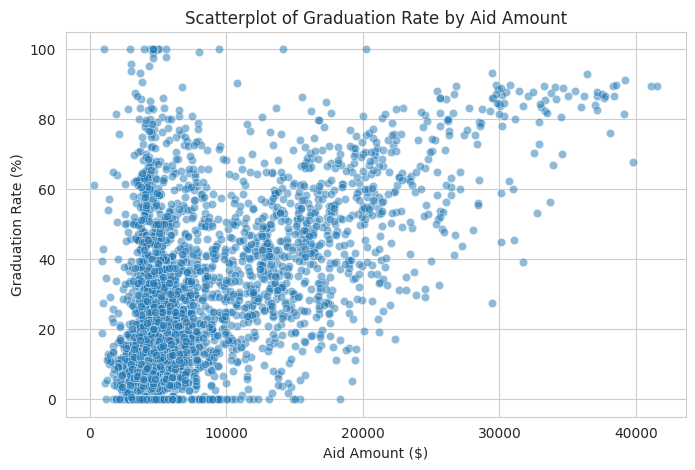

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Scatterplot of Graduation Rate vs. Aid Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(data=college_clean, x='aid_value', y='grad_100_value', alpha=0.5)

# Labels and title
plt.title('Scatterplot of Graduation Rate by Aid Amount')
plt.xlabel('Aid Amount ($)')
plt.ylabel('Graduation Rate (%)')

# Show plot
plt.show()


From the chart above, we see a positive correlation between aid amount and graduation rate. In general, as aid increases, graduation rate also increases. This is due to the financial burden being lifted.

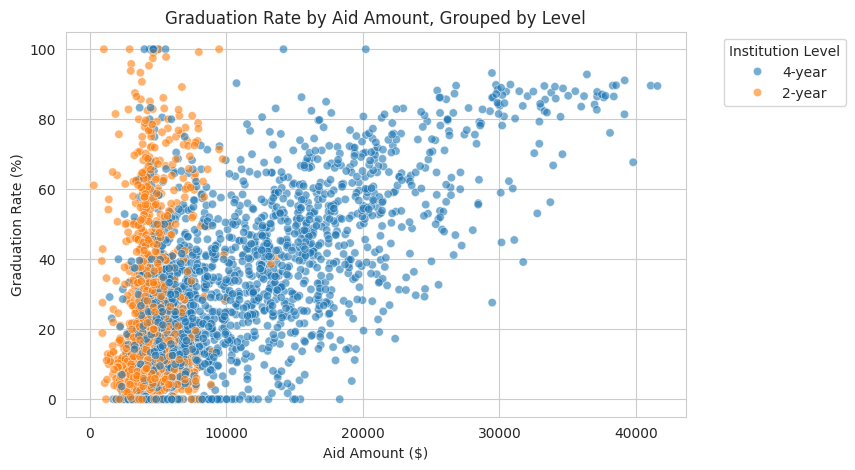

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Scatterplot: Grouped by Level
plt.figure(figsize=(8, 5))
sns.scatterplot(data=college_clean, x='aid_value', y='grad_100_value', hue='level', alpha=0.6)

# Titles and labels
plt.title('Graduation Rate by Aid Amount, Grouped by Level')
plt.xlabel('Aid Amount ($)')
plt.ylabel('Graduation Rate (%)')

# Legend placement
plt.legend(title='Institution Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


This chart allows us to see more clearly that a strong positive relationship exists between aid amount and graduation rate, in 4-year institutions. However, in 2-year institutions there seems to be no correlatiion present between aid amount and graduation rate. This makes sense because paying for 4 years of tutition is much more burdensome than 2 years, which is why the aid can be of huge help.